# Análisis Exploratorio (EDA)

## Primeros pasos

- Librerias empleadas.
- Carga del dataset
- Primeras observaciones sobre el mismo

In [58]:
import re
import pandas as pd
import numpy as np
from datetime import datetime
import scipy.stats as stats


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ruta_archivo = "MLA_100k_checked_v3.jsonlines"


In [3]:
df = pd.read_json(ruta_archivo, lines=True)
df.head()


,seller_address,warranty,sub_status,condition,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,...,stop_time,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,sold_quantity,available_quantity
0,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],new,[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8208882349,[],...,2015-11-04 20:42:53,active,None,NaN,NaN,1,2015-09-05 20:42:53,http://articulo.mercadolibre.com.ar/MLA4695330...,0,1
1,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NUESTRA REPUTACION,[],used,[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8141699488,[],...,2015-11-25 18:08:30,active,None,NaN,NaN,1,2015-09-26 18:08:30,http://articulo.mercadolibre.com.ar/MLA7160447...,0,1
2,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],used,[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8386096505,[],...,2015-11-08 23:57:07,active,None,NaN,NaN,1,2015-09-09 23:57:07,http://articulo.mercadolibre.com.ar/MLA7367189...,0,1
3,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],new,[],580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",5377752182,[],...,2015-12-04 01:13:16,active,None,NaN,NaN,1,2015-09-28 18:47:56,http://articulo.mercadolibre.com.ar/MLA9191625...,0,1
4,"{'country': {'name': 'Argentina', 'id': 'AR'},...",MI REPUTACION.,[],used,[],30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",2938071313,[],...,2015-10-23 22:07:20,active,None,NaN,NaN,1,2015-08-24 22:07:20,http://articulo.mercadolibre.com.ar/MLA7787961...,0,1


In [4]:
df.shape

(100000, 45)

In [5]:
df.columns

Index(['seller_address', 'warranty', 'sub_status', 'condition', 'deal_ids',
       'base_price', 'shipping', 'non_mercado_pago_payment_methods',
       'seller_id', 'variations', 'site_id', 'listing_type_id', 'price',
       'attributes', 'buying_mode', 'tags', 'listing_source', 'parent_item_id',
       'coverage_areas', 'category_id', 'descriptions', 'last_updated',
       'international_delivery_mode', 'pictures', 'id', 'official_store_id',
       'differential_pricing', 'accepts_mercadopago', 'original_price',
       'currency_id', 'thumbnail', 'title', 'automatic_relist', 'date_created',
       'secure_thumbnail', 'stop_time', 'status', 'video_id',
       'catalog_product_id', 'subtitle', 'initial_quantity', 'start_time',
       'permalink', 'sold_quantity', 'available_quantity'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 45 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   seller_address                    100000 non-null  object        
 1   warranty                          39104 non-null   object        
 2   sub_status                        100000 non-null  object        
 3   condition                         100000 non-null  object        
 4   deal_ids                          100000 non-null  object        
 5   base_price                        100000 non-null  float64       
 6   shipping                          100000 non-null  object        
 7   non_mercado_pago_payment_methods  100000 non-null  object        
 8   seller_id                         100000 non-null  int64         
 9   variations                        100000 non-null  object        
 10  site_id                          

## Columnas con listas y diccionarios

- Evaluamos cuantas y cuales
- Buscamos oportunidades de explotación para generación de nuevas features derivadas

In [7]:
columnas_diccionarios = [col for col in df.columns if df[col].apply(lambda x: isinstance(x, dict)).any()]
print("Columnas que contienen diccionarios:", columnas_diccionarios)

Columnas que contienen diccionarios: ['seller_address', 'shipping']


In [8]:
df[columnas_diccionarios].head()

,seller_address,shipping
0,"{'country': {'name': 'Argentina', 'id': 'AR'},...","{'local_pick_up': True, 'methods': [], 'tags':..."
1,"{'country': {'name': 'Argentina', 'id': 'AR'},...","{'local_pick_up': True, 'methods': [], 'tags':..."
2,"{'country': {'name': 'Argentina', 'id': 'AR'},...","{'local_pick_up': True, 'methods': [], 'tags':..."
3,"{'country': {'name': 'Argentina', 'id': 'AR'},...","{'local_pick_up': True, 'methods': [], 'tags':..."
4,"{'country': {'name': 'Argentina', 'id': 'AR'},...","{'local_pick_up': True, 'methods': [], 'tags':..."


In [9]:
columnas_listas = [col for col in df.columns if df[col].apply(lambda x: isinstance(x, list)).any()]
print("Columnas que contienen listas:", columnas_listas)

Columnas que contienen listas: ['sub_status', 'deal_ids', 'non_mercado_pago_payment_methods', 'variations', 'attributes', 'tags', 'coverage_areas', 'descriptions', 'pictures']


In [10]:
df[columnas_listas].head()

,sub_status,deal_ids,non_mercado_pago_payment_methods,variations,attributes,tags,coverage_areas,descriptions,pictures
0,[],[],"[{'description': 'Transferencia bancaria', 'id...",[],[],[dragged_bids_and_visits],[],[{'id': 'MLA4695330653-912855983'}],"[{'size': '500x375', 'secure_url': 'https://a2..."
1,[],[],"[{'description': 'Transferencia bancaria', 'id...",[],[],[],[],[{'id': 'MLA7160447179-930764806'}],"[{'size': '499x334', 'secure_url': 'https://a2..."
2,[],[],"[{'description': 'Transferencia bancaria', 'id...",[],[],[dragged_bids_and_visits],[],[{'id': 'MLA7367189936-916478256'}],"[{'size': '375x500', 'secure_url': 'https://a2..."
3,[],[],"[{'description': 'Transferencia bancaria', 'id...",[],[],[],[],[{'id': 'MLA9191625553-932309698'}],"[{'size': '441x423', 'secure_url': 'https://a2..."
4,[],[],"[{'description': 'Transferencia bancaria', 'id...",[],[],[dragged_bids_and_visits],[],[{'id': 'MLA7787961817-902981678'}],"[{'size': '375x500', 'secure_url': 'https://a2..."


In [11]:
df.non_mercado_pago_payment_methods.value_counts()

non_mercado_pago_payment_methods
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            30559
[{'description': 'Transferencia bancaria', 'id': 'MLATB', 'type': 'G'}, {'description': 'Efectivo', 'id': 'MLAMO', 'type': 'G'}]                                                                                                                                                                                                   

In [12]:
df.deal_ids.value_counts()

deal_ids
[]         99760
[MOSH6]       60
[WGPLA]       41
[15H9O]       28
[ABQ1I]       28
[LZFND]       22
[JXLIQ]        7
[MISCR]        6
[CHMGI]        6
[R99GD]        5
[GAC6A]        5
[GRMWV]        3
[AZEBL]        3
[UQU1U]        3
[ZZMKC]        2
[BBLRY]        2
[UKXWI]        2
[UUINF]        2
[VYYJI]        2
[PPW2S]        1
[YOLH8]        1
[7FOQD]        1
[WO4YE]        1
[Y3MPW]        1
[805OS]        1
[ZZHBN]        1
[QXDHA]        1
[SI7I0]        1
[W40QU]        1
[F9G6U]        1
[CULNX]        1
[VR2RD]        1
Name: count, dtype: int64

In [13]:
df.sub_status.value_counts()

sub_status
[]             99014
[suspended]      966
[expired]         13
[deleted]          7
Name: count, dtype: int64

In [14]:
df.coverage_areas.value_counts()

coverage_areas
[]    100000
Name: count, dtype: int64

In [15]:
df.tags.value_counts()

tags
[dragged_bids_and_visits]                            72551
[]                                                   24910
[good_quality_thumbnail, dragged_bids_and_visits]     1330
[dragged_visits]                                       516
[good_quality_thumbnail]                               392
[dragged_visits, free_relist]                          285
[poor_quality_thumbnail, dragged_bids_and_visits]       11
[poor_quality_thumbnail]                                 5
Name: count, dtype: int64

In [16]:
df.attributes.value_counts()

attributes
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

Los tipos de pago son de mi interés para este problema, porque a mi entender los productos usados suelen tener muchos menos formas de pago que los nuevos, siendo probablemente el más popular el efectivo o el débito. Vamos a extraer dicha información y generar nuevas features de cada pago

In [17]:
columna_metodos_pago = "non_mercado_pago_payment_methods"
if columna_metodos_pago in df.columns:

    # Extraer todos los métodos de pago únicos presentes en los datos
    metodos_unicos = set()
    for lista_metodos in df[columna_metodos_pago].dropna():
        if isinstance(lista_metodos, list):
            metodos_unicos.update([metodo['id'] for metodo in lista_metodos])

    # Crear nuevas columnas para cada método de pago con valores binarios
    for metodo in metodos_unicos:
        df[f"pago_{metodo}"] = df[columna_metodos_pago].apply(
            lambda x: 1 if isinstance(x, list) and any(metodo == metodo_dict['id'] for metodo_dict in x) else 0
        )

    # Eliminar la columna original ya que ha sido transformada
    df.drop(columns=[columna_metodos_pago], inplace=True)

### Aquellas que a mi criterio no van a agregar valor son removidas

In [18]:
df.drop(columns=['sub_status', 'deal_ids', 'variations', 'attributes', 'tags', 'coverage_areas', 'descriptions', 'pictures'], inplace=True)

In [19]:
df.head()

,seller_address,warranty,condition,base_price,shipping,seller_id,site_id,listing_type_id,price,buying_mode,...,pago_MLAMP,pago_MLAVS,pago_MLAWT,pago_MLAMO,pago_MLAMC,pago_MLAOT,pago_MLAVE,pago_MLAMS,pago_MLADC,pago_MLAAM
0,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,new,80.0,"{'local_pick_up': True, 'methods': [], 'tags':...",8208882349,MLA,bronze,80.0,buy_it_now,...,0,0,0,1,0,0,0,0,0,0
1,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NUESTRA REPUTACION,used,2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...",8141699488,MLA,silver,2650.0,buy_it_now,...,0,0,0,1,0,0,0,0,0,0
2,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,used,60.0,"{'local_pick_up': True, 'methods': [], 'tags':...",8386096505,MLA,bronze,60.0,buy_it_now,...,0,0,0,1,0,1,0,0,0,0
3,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,new,580.0,"{'local_pick_up': True, 'methods': [], 'tags':...",5377752182,MLA,silver,580.0,buy_it_now,...,0,0,0,1,0,1,0,0,0,0
4,"{'country': {'name': 'Argentina', 'id': 'AR'},...",MI REPUTACION.,used,30.0,"{'local_pick_up': True, 'methods': [], 'tags':...",2938071313,MLA,bronze,30.0,buy_it_now,...,0,0,0,1,0,0,0,0,0,0


### Estudiamos las variables con diccionarios.

Se buscará parsear los diccionarios, para extraer aquello que pueda resultar de interés al problema

In [20]:
df.seller_address[0]

{'country': {'name': 'Argentina', 'id': 'AR'},
 'state': {'name': 'Capital Federal', 'id': 'AR-C'},
 'city': {'name': 'San Cristóbal', 'id': 'TUxBQlNBTjkwNTZa'}}

In [21]:
paises_unicos = df['seller_address'].dropna().apply(
    lambda x: x.get("country", {}).get("name") if isinstance(x, dict) else None
).unique()
print("Países únicos presentes en los datos:", paises_unicos)

Países únicos presentes en los datos: ['Argentina' '']


Vamos a extraer de seller_address la información de la ubicación del vendedor, es decir, el estado y la ciudad. Para ello, vamos a concatenar el id del estado y el id de la ciudad en una nueva columna llamada ubicacion_concatenada.


In [ ]:
if 'seller_address' in df.columns:
    df["ubicacion_concatenada"] = df['seller_address'].apply(
        lambda x: f"{x.get('state', {}).get('id', '')}_{x.get('city', {}).get('id', '')}"
        if isinstance(x, dict) else None
    )

    # Eliminar la columna original ya que ha sido transformada
    df.drop(columns=['seller_address'], inplace=True)

In [23]:
df.shipping[0]

{'local_pick_up': True,
 'methods': [],
 'tags': [],
 'free_shipping': False,
 'mode': 'not_specified',
 'dimensions': None}

Vamos a extraer de shipping la información de si el envío es gratis y si se puede retirar en persona, y generar nuevas features a partir de las mismas.

In [ ]:
columna_shipping = "shipping"

if columna_shipping in df.columns:
    df["retiro_en_persona"] = df[columna_shipping].apply(
        lambda x: x.get("local_pick_up", False) if isinstance(x, dict) else False
    )
    
    df["envio_gratis"] = df[columna_shipping].apply(
        lambda x: x.get("free_shipping", False) if isinstance(x, dict) else False
    )

    # Eliminar la columna original ya que ha sido transformada
    df.drop(columns=[columna_shipping], inplace=True)

Ahora la idea es hacer un gran resumen de la información tal como nos ha quedado hasta ahora.

In [ ]:
def resumen_columnas(df):
    resumen_datos = []

    for nombre_columna in df.columns:
        tipo_dato = df[nombre_columna].dtype
        nulos = df[nombre_columna].isnull().sum()
        no_nulos = df[nombre_columna].notnull().sum()
        valores_unicos = df[nombre_columna].nunique()

        if valores_unicos <= 10:
            conteo_valores = df[nombre_columna].value_counts().to_dict()
        else:
            top_10_valores = df[nombre_columna].value_counts().head(10).to_dict()
            conteo_valores = {k: v for k, v in sorted(top_10_valores.items(), key=lambda item: item[1], reverse=True)}

        resumen_datos.append({
            'nombre_columna': nombre_columna,
            'tipo_dato': tipo_dato,
            'nulos': nulos,
            'no_nulos': no_nulos,
            'valores_unicos': valores_unicos,
            'conteo_valores': conteo_valores
        })

    df_resumen = pd.DataFrame(resumen_datos)
    return df_resumen

In [28]:
df_resumen = resumen_columnas(df)

# Mostrar el resumen
display(df_resumen)

,nombre_columna,tipo_dato,nulos,no_nulos,valores_unicos,conteo_valores
0,warranty,object,60896,39104,10264,"{'Sí': 5682, 'Sin garantía': 5442, 'SI': 592, ..."
1,condition,object,0,100000,2,"{'new': 53758, 'used': 46242}"
2,base_price,float64,0,100000,10330,"{50.0: 3209, 100.0: 2833, 150.0: 2492, 60.0: 2..."
3,seller_id,int64,0,100000,35915,"{5248662274: 933, 2015548469: 727, 7704929703:..."
4,site_id,object,0,100000,1,{'MLA': 100000}
5,listing_type_id,object,0,100000,7,"{'bronze': 63170, 'free': 21388, 'silver': 911..."
6,price,float64,0,100000,10331,"{50.0: 3209, 100.0: 2833, 150.0: 2492, 60.0: 2..."
7,buying_mode,object,0,100000,3,"{'buy_it_now': 97001, 'classified': 2219, 'auc..."
8,listing_source,object,0,100000,1,{'': 100000}
9,parent_item_id,object,23011,76989,76989,"{'MLA3503278374': 1, 'MLA6553902747': 1, 'MLA7..."


### Vemos oportunidades de crear valor a partir de la información de warranty

Tal como esta ahora mismo, esa variable no sirve por no tener una estructura homogenea.
Utilizaremos de forma muy básica el procesamiento del lenguaje natural (NLP), con expresiones regulares para extraer cierta lógica de garantias.

In [29]:
df.warranty.value_counts()[:50]

warranty
Sí                                                                                                                                                                                                                                     5682
Sin garantía                                                                                                                                                                                                                           5442
SI                                                                                                                                                                                                                                      592
6 meses                                                                                                                                                                                                                                 547
6 MESES                                        

In [30]:
# Lista de palabras clave que indican garantía, con mejoras para evitar falsos positivos
palabras_garantia = ["si", "sí", "mes", "meses", "dias", "días", "año", "años", "vida", "total", "con garantía", "de fabrica"]

# Expresiones regulares para capturar "ano" y "anos" como palabras completas (evitando falsos positivos)
año_mal_escrito = r'\bano\b'
años_mal_escrito = r'\banos\b' 

columna_warranty = "warranty"

if columna_warranty in df.columns:
    df["garantia"] = df[columna_warranty].apply(
        lambda x: None if pd.isna(x) else (
            1 if any(palabra in str(x).lower() for palabra in palabras_garantia) or 
                 re.search(año_mal_escrito, str(x).lower()) or 
                 re.search(años_mal_escrito, str(x).lower()) else 0
        )
    )


In [31]:
df[['warranty', 'garantia']].head(10)

,warranty,garantia
0,None,NaN
1,NUESTRA REPUTACION,0.0
2,None,NaN
3,None,NaN
4,MI REPUTACION.,0.0
5,Sí,1.0
6,None,NaN
7,None,NaN
8,1 Ano,1.0
9,None,NaN


In [32]:
df.garantia.value_counts()

garantia
1.0    27685
0.0    11419
Name: count, dtype: int64

In [ ]:
# Creamos nuevas features a partir de date_created, para extraer el día, mes y año de la fecha de creación del anuncio.
columna_fecha = "date_created"

if columna_fecha in df.columns:
    # Convertir la columna a formato datetime
    df[columna_fecha] = pd.to_datetime(df[columna_fecha], format='%Y-%m-%dT%H:%M:%S.%fZ', errors='coerce')

    # Extraer día, mes y año en nuevas columnas
    df["date_created_dia"] = df[columna_fecha].dt.day
    df["date_created_mes"] = df[columna_fecha].dt.month
    df["date_created_anio"] = df[columna_fecha].dt.year

In [ ]:
# El id del video en si no es algo explotable, pero buscamos saber si hay un video o no en el anuncio, y a partir de esto veremos si es una caracteristica relevante al momento de predecir si es articulo nuevo o no.
columna_video = "video_id"

if columna_video in df.columns:
    # Crear la nueva columna 'tiene_video' que indica si hay un video (1) o no (0)
    df["tiene_video"] = df[columna_video].notna().astype(int)

### Removemos columnas que ya fueron explotadas o que no considero que sumen al análisis posterior.

In [35]:
df.drop(columns=['site_id', 
                 'listing_source', 
                 'parent_item_id',
                 'category_id', 
                 'last_updated', 
                 'international_delivery_mode',
                 'differential_pricing',
                 'thumbnail',
                 'title',
                 'secure_thumbnail',
                 'stop_time',
                 'subtitle',
                 'start_time',
                 'permalink',
                 'warranty',
                 'date_created',
                 'video_id'
                 ], inplace=True)

## Visualizaciones

### Gráfico de torta para observar rápidamente proporciones de la variable objetivo

In [ ]:
sns.set_style("whitegrid")

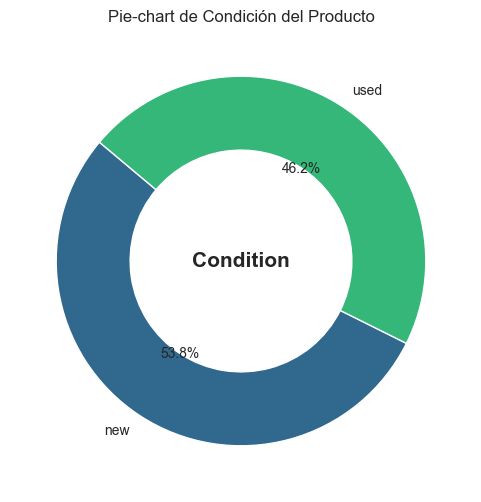

In [44]:
# Crear un gráfico de torta para la variable 'condition'
plt.figure(figsize=(6, 6))

condition_counts = df["condition"].value_counts()

colors = sns.color_palette("viridis", len(condition_counts))

plt.pie(condition_counts, labels=condition_counts.index, autopct='%1.1f%%', startangle=140,
        colors=colors, wedgeprops=dict(width=0.4))

plt.title("Pie-chart de Condición del Producto")
plt.text(0, 0, "Condition", ha='center', va='center', fontsize=15, fontweight='bold')

plt.show()

Las cantidades estan casi 50-50. Ya podemos tener presente que no habrá demasiados inconvenientes de desbalance del target.

### Realizaremos gráficos de barras para diversas variables categóricas y binarias, discriminando por la variable target

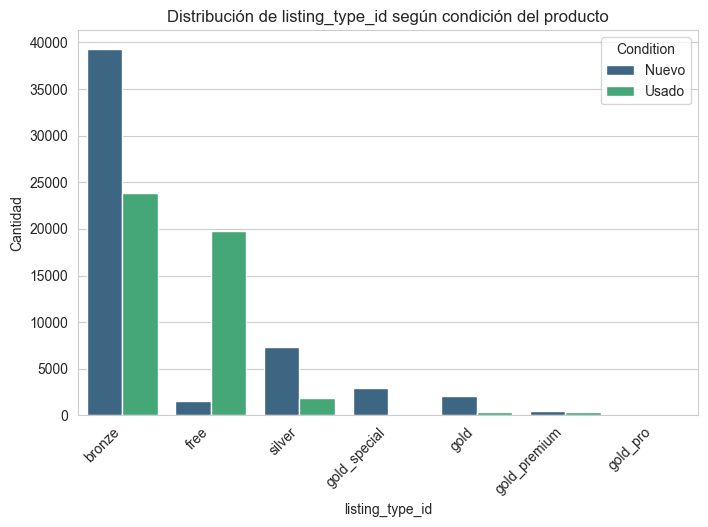

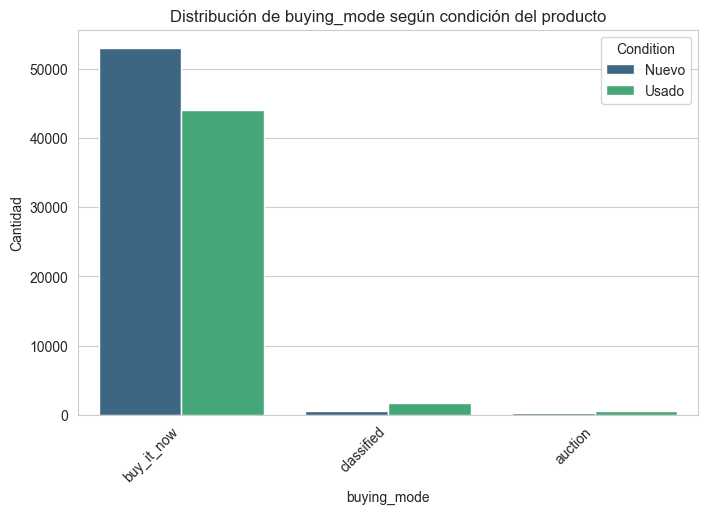

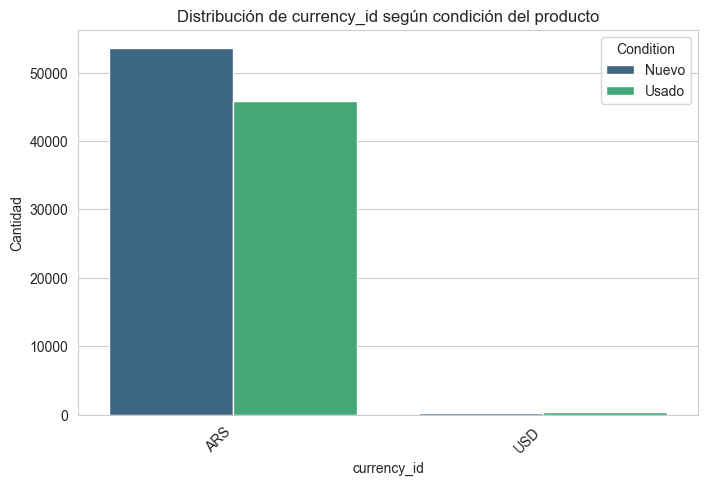

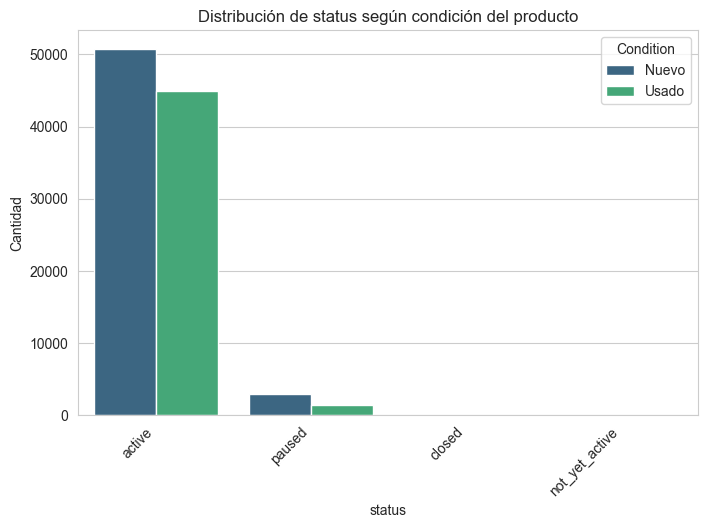

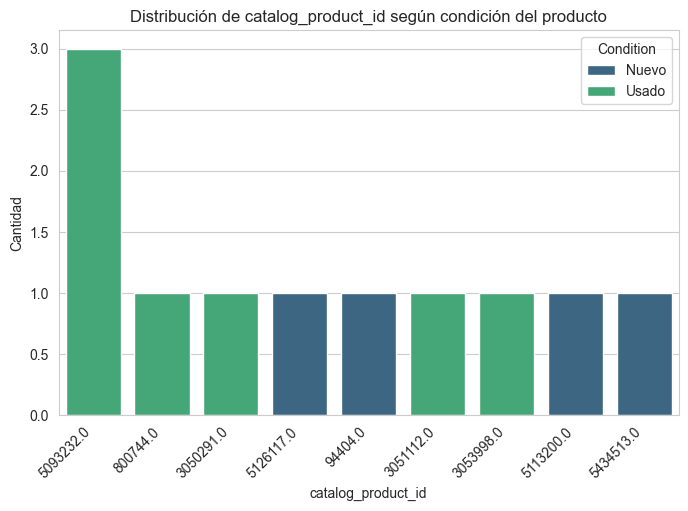

In [37]:
# Variables categóricas
variables_categoricas = ["listing_type_id", "buying_mode", "currency_id", "status", "catalog_product_id"]

# Variables binarias
variables_binarias = ["garantia", "accepts_mercadopago", "automatic_relist", "retiro_en_persona", "envio_gratis", "tiene_video"]

# Gráficos para variables categóricas
for var in variables_categoricas:
    if var in df.columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df, x=var, hue="condition", order=df[var].value_counts().index, palette="viridis")
        plt.xticks(rotation=45, ha='right')
        plt.title(f"Distribución de {var} según condición del producto")
        plt.xlabel(var)
        plt.ylabel("Cantidad")
        plt.legend(title="Condition", labels=["Nuevo", "Usado"])
        plt.show()

Ya podemos observar ciertas variables que a simple vista tienen una sensibilidad cuando el producto es usado o nuevo. Por ejemplo:
- listing_type_id
- catalog_product_id

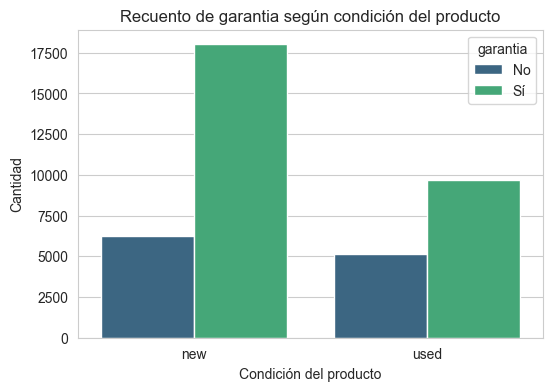

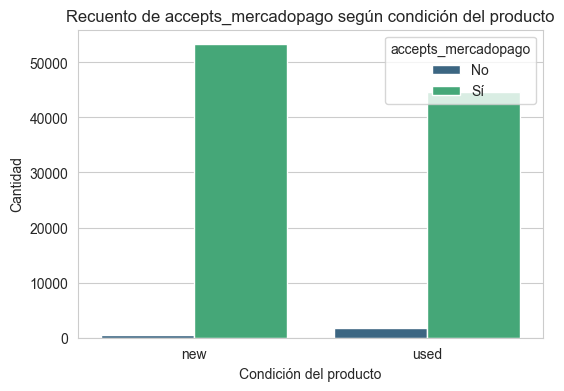

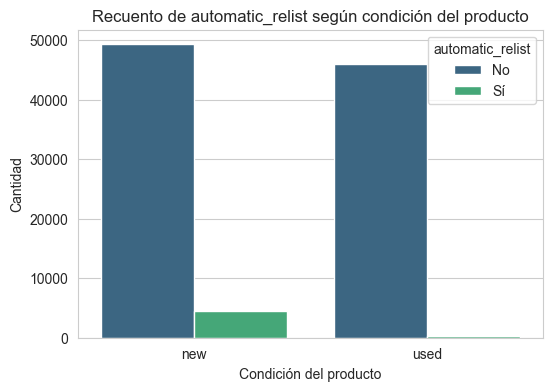

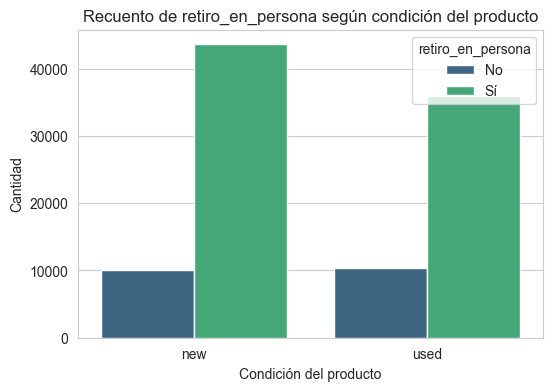

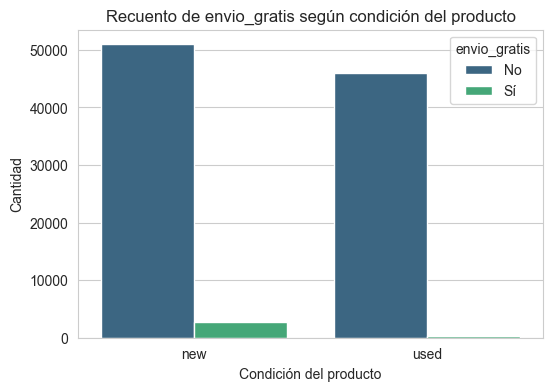

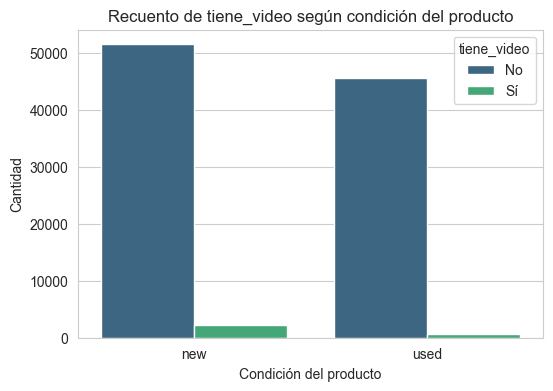

In [40]:
# Gráficos de recuento para variables binarias
for var in variables_binarias:
    if var in df.columns:
        plt.figure(figsize=(6, 4))
        sns.countplot(data=df, x="condition", hue=var, palette="viridis")
        plt.title(f"Recuento de {var} según condición del producto")
        plt.xlabel("Condición del producto")
        plt.ylabel("Cantidad")
        plt.legend(title=var, labels=["No", "Sí"])
        plt.show()

Dentro de las variables binarias, encontramos que la feature que generamos de "garantía" resulta muy provechosa para discriminar entre productos usados y nuevos. Es menos frecuente tener un producto usado con garantía (algo esperable a priori, que ahora vemos en datos).

Hay algunas variables que tienen un comportamiento levemente diferente entre nuevos y usados, que podríamos explorar en el modelo para ver si aportan al proceso de clasificación:
- automatic_relist
- retiro_en_persona
- envio_gratis

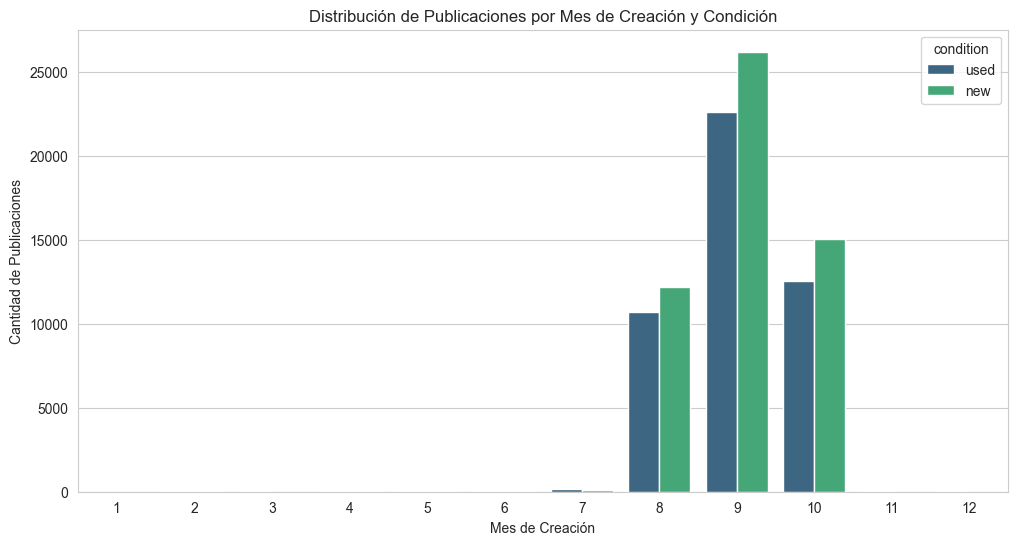

In [ ]:
# Crear un gráfico de barras para 'date_created_mes'
plt.figure(figsize=(12, 6))

# Graficar la distribución de 'date_created_mes' separado por 'condition'
sns.countplot(data=df, x="date_created_mes", hue="condition", palette="viridis")
plt.xlabel("Mes de Creación")
plt.ylabel("Cantidad de Publicaciones")
plt.title("Distribución de Publicaciones por Mes de Creación y Condición")

plt.show()

El mes de publicación no parece ser una variable relevante a simple vista.

<Figure size 1200x800 with 0 Axes>

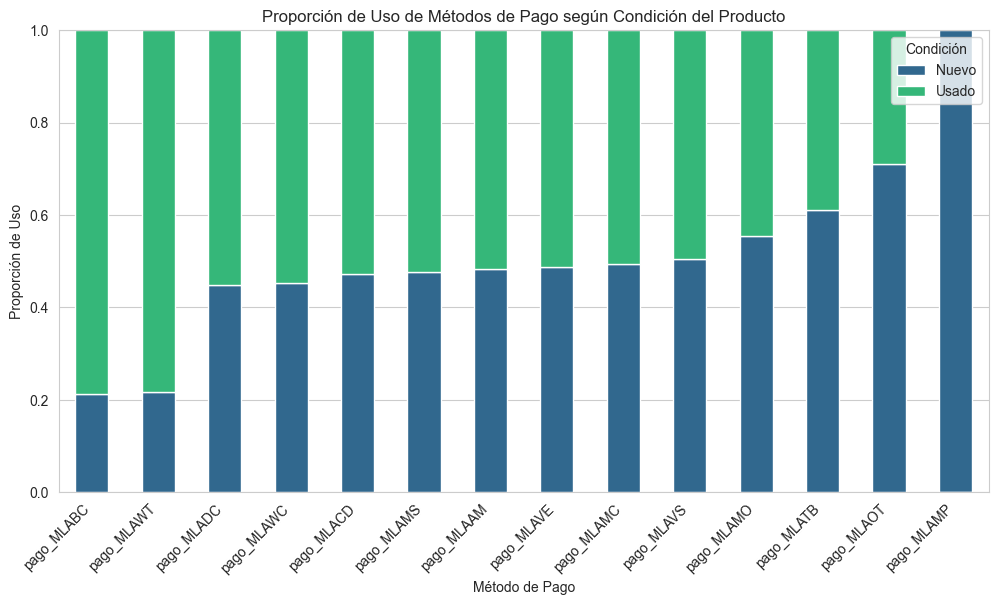

In [ ]:
# Calcular las proporciones de cada método de pago por condición
columnas_pago = [col for col in df.columns if col.startswith("pago_")]

df_pagos = df.groupby("condition")[columnas_pago].sum().T

# Convertir las cantidades absolutas en proporciones
df_pagos = df_pagos.div(df_pagos.sum(axis=1), axis=0)

df_pagos = df_pagos.sort_values(by="used", ascending=False)

plt.figure(figsize=(12, 8))

colors = sns.color_palette("viridis", 2)
df_pagos.plot(kind="bar", stacked=True, figsize=(12, 6), color=colors)
plt.xlabel("Método de Pago")
plt.ylabel("Proporción de Uso")
plt.title("Proporción de Uso de Métodos de Pago según Condición del Producto")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Condición", labels=["Nuevo", "Usado"])
plt.ylim(0, 1)

plt.show()

Hay ciertos métodos de pago que claramente son más propensos a darse en ventas de productos usados, y otros en nuevos. Este factor parece ser crucial también para que el modelo logre decidir correctamente en el proceso de clasificación.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20532\1829234507.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="condition", y="price", palette="viridis")


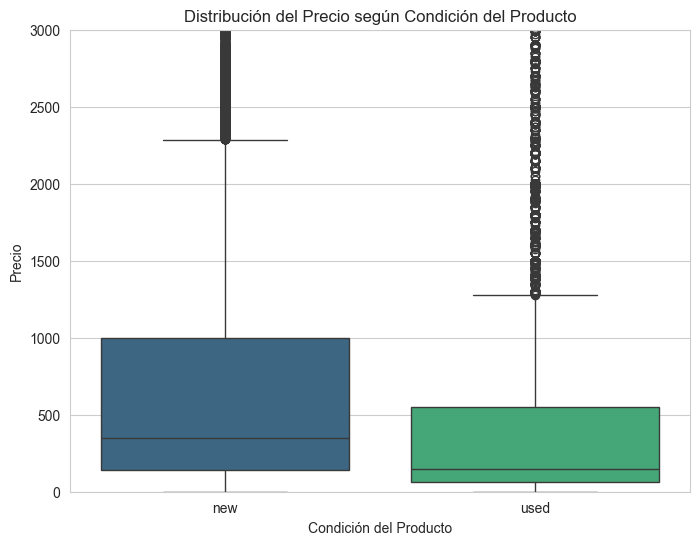

In [ ]:
# Crear un boxplot para 'price' separado por 'condition'
plt.figure(figsize=(8, 6))

# Graficar boxplot con colores consistentes con los usados antes
sns.boxplot(data=df, x="condition", y="price", palette="viridis")

plt.xlabel("Condición del Producto")
plt.ylabel("Precio")
plt.ylim(0, 3000)
plt.title("Distribución del Precio según Condición del Producto")

plt.show()

Los productos usados tienen precios menores como vemos a simple vista, mediana menor, rango intercuartícilico menor, Q1-Q3 menores. Es una variable para tener en cuenta.

### Vamos a observar relaciones entre variable objetivo y otras, para complementar lo revisado previamente de forma gráfica, pero ahora analíticamente.

Dado que "condition" es una variable categórica binaria, vamos a buscar relaciones con 2 métricas:
- Cramers'v para condition con otras variables categóricas.
- Point Biserial para condition contra otras variables numéricas.

In [ ]:
df["condition_numeric"] = df["condition"].map({"new": 1, "used": 0}).astype("category")

# Identificar columnas de pago (que empiezan con "pago_")
columnas_pago = [col for col in df.columns if col.startswith("pago_")]

# Convertir variables de pago, garantía y tiene_video a categóricas
for col in columnas_pago + ["garantia", "tiene_video"]:
    if col in df.columns:
        df[col] = df[col].astype("category")

# Convertir variables booleanas a 1/0 y luego a categóricas
variables_bool = df.select_dtypes(include=['bool']).columns.tolist()
for col in variables_bool:
    df[col] = df[col].astype(int).astype("category")

# Separar variables por tipo
variables_numericas = df.select_dtypes(include=['int64', 'float64', 'int32']).columns.tolist()
variables_categoricas = df.drop(columns=["id"]).select_dtypes(include=['object', 'category']).columns.tolist()


if 'condition' in variables_categoricas:
    variables_categoricas.remove('condition')

# Calcular correlación biserial puntual para variables numéricas, ignorando NaN e infinitos
resultados_point_biserial = []
for var in variables_numericas:
    if var != "condition_numeric":
        valid_rows = df[[var, "condition_numeric"]].dropna()  # Remover NaN
        if np.isfinite(valid_rows[var]).all():  # Asegurar valores finitos
            correlation, p_value = stats.pointbiserialr(valid_rows["condition_numeric"].astype(int), valid_rows[var])
            resultados_point_biserial.append({"Variable": var, "Correlación biserial": correlation, "p-value": p_value})

# Función para calcular Cramér’s V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Calcular Cramér’s V para variables categóricas
resultados_cramers_v = []
for var in variables_categoricas:
    if var in df.columns:
        valid_x = df[var].dropna()
        valid_y = df["condition"].loc[valid_x.index]
        cramers_v_value = cramers_v(valid_x, valid_y)  # Remover NaN
        resultados_cramers_v.append({"Variable": var, "Cramér's V": cramers_v_value})

# Convertir resultados a DataFrames
df_point_biserial = pd.DataFrame(resultados_point_biserial).sort_values(by="Correlación biserial", ascending=False)
df_cramers_v = pd.DataFrame(resultados_cramers_v).sort_values(by="Cramér's V", ascending=False)

c:\Users\Usuario\Documents\challenge_meli\meli\lib\site-packages\scipy\stats\_stats_py.py:5535: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rpb, prob = pearsonr(x, y)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_20532\815266243.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_point_biserial["Variable"], x=df_point_biserial["Correlación biserial"], palette="viridis")


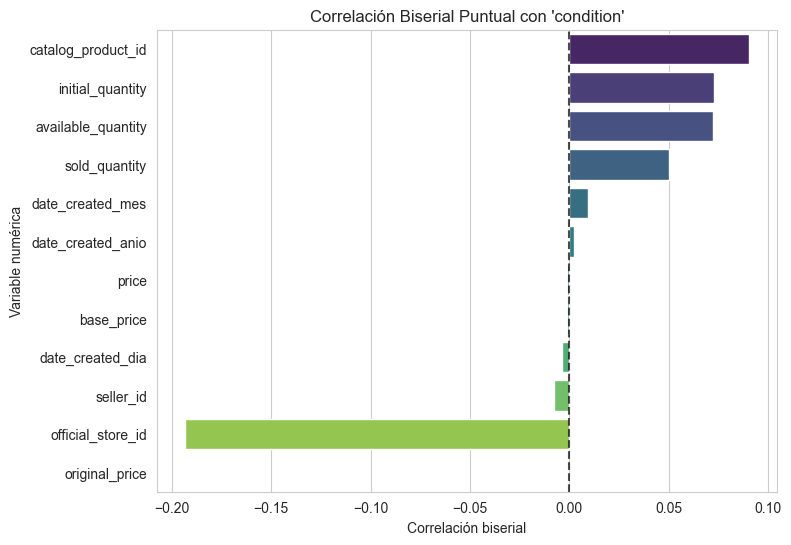

In [73]:
# Graficar Correlación Biserial Puntual
if not df_point_biserial.empty:
    plt.figure(figsize=(8, 6))
    sns.barplot(y=df_point_biserial["Variable"], x=df_point_biserial["Correlación biserial"], palette="viridis")
    plt.xlabel("Correlación biserial")
    plt.ylabel("Variable numérica")
    plt.title("Correlación Biserial Puntual con 'condition'")
    plt.axvline(x=0, color="black", linestyle="--", alpha=0.7)  # Línea en 0 para referencia
    plt.show()

Si bien son relaciones cuantitativamente bajas, rescatamos algunas variables para sumar al análisis por la relación que mantienen con la variable objetivo:
- catalog_product_id (ya la habiamos visto gráficamente antes)
- initial_quantity
- available_quantity
- sold_quantity
Estas 3 últimas tiene cierta lógica que se diferencien entre productos nuevos y usados, siendo que estos últimos suelen venderse por 1 unidad, 1 disponible inicialmente, etc.

Sumaremos también official_store_id que evidentemente resalta aquí por el hecho de que los productos nuevos son más propensos a venderse en tiendas oficiales, y los usados por particulares.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20532\1268648388.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_cramers_v["Variable"], x=df_cramers_v["Cramér's V"], palette="viridis")


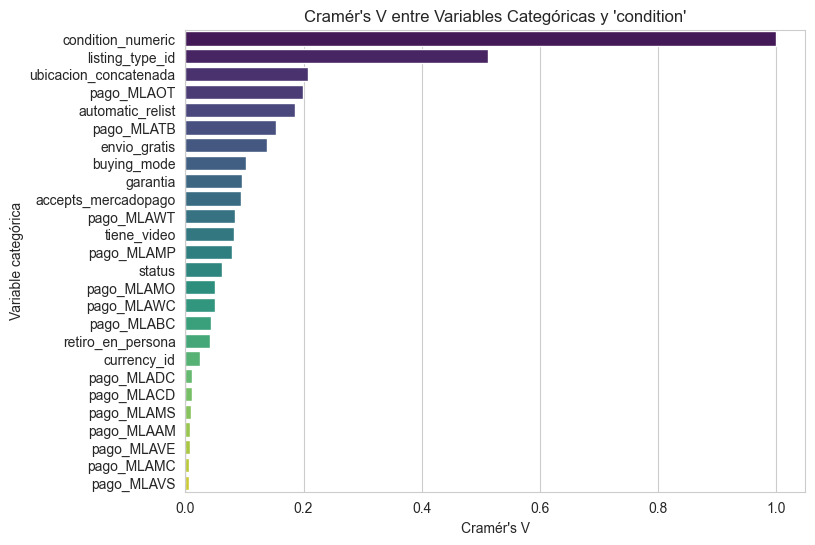

In [74]:
# Graficar Cramér's V
if not df_cramers_v.empty:
    plt.figure(figsize=(8, 6))
    sns.barplot(y=df_cramers_v["Variable"], x=df_cramers_v["Cramér's V"], palette="viridis")
    plt.xlabel("Cramér's V")
    plt.ylabel("Variable categórica")
    plt.title("Cramér's V entre Variables Categóricas y 'condition'")
    plt.axvline(x=0, color="black", linestyle="--", alpha=0.7)  # Línea en 0 para referencia
    plt.show()

En este último encontramos variables que ya habiamos visto gráficamente que iban a tener impacto, lo cual no hace más que confirmar que va a convenir agregarlas al análisis:
- listing_type_id
- algunos pagos puntuales
- envio_gratis

ubicación_concatenada es básicamente la feature de "provincia+localidad" y si bien figura alta, mi idea es comenzar el modelado sin agregarla, y solo usarla si las métricas no cierran, debido a que dicha variable aumentará las dimensiones del problema considerablemente, y la idea también es lograr un modelo lo más parsimonioso posible.